<a href="https://colab.research.google.com/github/Permanganant/EHB-420E---Artificial-Neural-Networks-/blob/main/HW3_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EHB 420E Artificial Neural Networks
# Homework - 3

Mert Alperen Beser

You can reach the homework with this https://colab.research.google.com/drive/19u0HQd1FYe9KvSRJvicRj9caQqLQEXAi#scrollTo=_Pr9-FT6ik-g link

## Problem - 1

---

The purpose of this practice is first to be able to fill the gaps. Because not real-world
solutions are black and white. There is always going to be unforeseen variables. In this
exercise, you must create various variable and outputs for various scenarios. You should
show an ability to choose most convincing conclusion among them.
The current touristic town has 505505 people
The amount of people leave from the town daily
P_leave = 56780
decrease the amount of people by 10% to account for population
add the people variable to the p_number variable
increase p_number by 5% to account for next day that touris entrance into the town
in the days following weekend
decrease p_number by 5% to account for kids
subtract 25000 people from p_number to account for town workers
print the new value of the p_number variable

In [ ]:
current_pop = 505505 #tourist+town workers+ children + p_number
P_leave = 56780 #daily leaving
p_number =  5

for j in range (0,1):

  for i in range(1,8):
    p_number += current_pop - current_pop/10 
    if(i == 6 or i == 7):
      p_number += p_number*(1/20) 
      p_number -= 25000

    p_number -= p_number*(1/20)   
    print(current_pop)
    current_pop -= P_leave

p_number

505505
448725
391945
335165
278385
221605
164825


1785196.2793021551

## Problem - 2

---


Please review the following data set, which is uploaded to the class documents as Data Set 1:
AI_Dataset1.txt
Data show I-V characteristics of array of LED devices.
Experiments taken back to back for 21 identical devices. Every voltage sweep includes, reverse
sweep as well.
Please try to clean, sort, the data and try to come up most meaningful I-V degradation graphics.

--- 
Importing required libraries 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

This function below reads the data set given in the question and returns the desired data as output. First input of the function takes the measurement number and the second input takes the indicator. Indicators can be 3,5,9,10,11,15,16,17. Indicators are for getting desired data from the function. 3 represents the U2722 Channel settings, 5 represents the B2900 Channel 1 settings, 9 represents the Voltage_Sweep_Channel data, 10 represents the Current1_Sweep_Channel data, 11 represents the Current2_Sweep_Channel, 15 represents the Voltage_Sweep_Channel_Reversed data, 16 represents the Current1_Sweep_Channel reversed data and 17 represents the Current2_Sweep_Channel reversed data. To clean zeros at the end maximization index technique was used.

In [32]:
def led_data(Measurment_num,indicator):
  general_path = '/content/drive/MyDrive/Classroom/ANN/AI_Dataset1.txt'
  with open(general_path, encoding='utf8') as f:
      counter = 0
      zeta = 18
      i = Measurment_num-1

      for line in f:
        counter += 1

        if counter == indicator +(i*zeta) and indicator == 3:#3
          #U2722 Channel settings:
          text = line.strip()
          Current_Range_str = 'Current Range:'
          index = text.find(Current_Range_str)
          Current_Range = text[index+len(Current_Range_str):text.find('mA')]
          Voltage_Limit_str = 'Voltage Limit (V):'
          index = text.find(Voltage_Limit_str)
          Voltage_Limit = text[index+len(Voltage_Limit_str):text.find('O')]
          Output_Level_str = 'Output Leve (mA):'
          index = text.find(Output_Level_str)
          Output_Level = text[index+len(Output_Level_str):-1]
          return float(Current_Range), float(Voltage_Limit), float(Output_Level)
        elif counter == indicator +(i*zeta) and indicator == 5:#5
          text = line.strip()
          #B2900 Channel 1 settings:
          ChSweep_Start_str = 'Ch.1Sweep Start (V):'
          index = text.find(ChSweep_Start_str)
          ChSweep_Start = text[index+len(ChSweep_Start_str):text.find('\tCh.1 Sweep Stop')]
          ChSweep_Stop_str = 'Ch.1 Sweep Stop (V):'
          index = text.find(ChSweep_Stop_str)
          ChSweep_Stop = text[index+len(ChSweep_Stop_str):text.find('\tCh.2 Sweep Number')]
          ChSweep_Number_Steps_str = 'Ch.2 Sweep Number of Steps:'
          index = text.find(ChSweep_Number_Steps_str)
          ChSweep_Number_Steps = text[index+len(ChSweep_Number_Steps_str):text.find('\tCh.2 Current Range')]
          ChCurrent_Range_str = 'Ch.2 Current Range (A):'
          index = text.find(ChCurrent_Range_str)
          ChCurrent_Range = text[index+len(ChCurrent_Range_str):-1]
          return ChSweep_Start,  ChSweep_Stop ,  ChSweep_Number_Steps, ChCurrent_Range

        elif counter == indicator + (i*zeta) and indicator == 9:#9
          text = line.split()
          text = text[4:-1]
          Voltage_Sweep_Channel = text[0:text.index(max(text))] #Maximize index can eliminate the zeros at the end
          Voltage_Sweep_Channel = list(map(float, Voltage_Sweep_Channel))
          return Voltage_Sweep_Channel
          
        elif counter == indicator +(i*zeta) and indicator == 10:#10
          text = line.split()
          text = text[4:-1]
          Current1_Sweep_Channel = text[0:-1]
          Current1_Sweep_Channel = list(map(float, Current1_Sweep_Channel))
          return Current1_Sweep_Channel

        elif counter == indicator +(i*zeta) and indicator == 11:#11
          text = line.split()
          text = text[4:-1]
          Current2_Sweep_Channel = text[0:-1]
          Current2_Sweep_Channel = list(map(float, Current2_Sweep_Channel))
          return Current2_Sweep_Channel

        #Reverse Sweep
        elif counter == indicator +(i*zeta) and indicator == 15:#15
          text = line.split()
          text = text[5:-1]
          Voltage_Sweep_Channel_R = text[0:-1]
          Voltage_Sweep_Channel_R = list(map(float, Voltage_Sweep_Channel_R))
          return Voltage_Sweep_Channel_R

        elif counter == indicator +(i*zeta) and indicator == 16:#16
          text = line.split()
          Current1_Sweep_Channel_R = text[4:-1]
          Current1_Sweep_Channel_R = list(map(float, Current1_Sweep_Channel_R))
          return Current1_Sweep_Channel_R

        elif counter == indicator +(i*zeta) and indicator == 17:#17
          text = line.split()
          Current2_Sweep_Channel_R = text[4:-1]
          Current2_Sweep_Channel_R = list(map(float, Current2_Sweep_Channel_R))
          return Current2_Sweep_Channel_R


The code below prints all the U2722 and B2900 channel settings for all 27 measurements.

In [11]:
for i in range(1,28):
    
    Current_Range, Voltage_Limit,Output_Level = led_data(i,3)
    print("U2722 Channel %s settings:" %i)
    print("Current Range (mA):  ", Current_Range, "Voltage Limit (V):  ", Voltage_Limit ,"Output Level (mA):  ", Output_Level)
    print("\n")
    
    ChSweep_Start,  ChSweep_Stop ,  ChSweep_Number_Steps, ChCurrent_Range = led_data(i,5)
    print("B2900 Channel %s settings:" %i)
    print("Ch.1Sweep Start (V):", ChSweep_Start, " Ch.1 Sweep Stop (V):", ChSweep_Stop ," Ch.2 Sweep Number of Steps:", ChSweep_Number_Steps," Ch.2 Current Range (A): ", ChCurrent_Range)
    print("\n")

U2722 Channel 1 settings:
Current Range (mA):   1.0 Voltage Limit (V):   6.0 Output Level (mA):   0.00026


B2900 Channel 1 settings:
Ch.1Sweep Start (V):  0.00  Ch.1 Sweep Stop (V):  6.00  Ch.2 Sweep Number of Steps:  61  Ch.2 Current Range (A):   0.01000


U2722 Channel 2 settings:
Current Range (mA):   1.0 Voltage Limit (V):   6.0 Output Level (mA):   0.00052


B2900 Channel 2 settings:
Ch.1Sweep Start (V):  0.00  Ch.1 Sweep Stop (V):  6.00  Ch.2 Sweep Number of Steps:  61  Ch.2 Current Range (A):   0.01000


U2722 Channel 3 settings:
Current Range (mA):   10.0 Voltage Limit (V):   6.0 Output Level (mA):   0.00104


B2900 Channel 3 settings:
Ch.1Sweep Start (V):  0.00  Ch.1 Sweep Stop (V):  6.00  Ch.2 Sweep Number of Steps:  61  Ch.2 Current Range (A):   0.01000


U2722 Channel 4 settings:
Current Range (mA):   10.0 Voltage Limit (V):   6.0 Output Level (mA):   0.00208


B2900 Channel 4 settings:
Ch.1Sweep Start (V):  0.00  Ch.1 Sweep Stop (V):  6.00  Ch.2 Sweep Number of Steps:  61

This section below plots the V-I characteristic for all 27 measurements. The first two plot for each figure represents **Voltage Sweep Channel - Current1 Sweep Channel(red colored)** and **Voltage Sweep Channel - Current2 Sweep Channel(green colored)** plots respectively. The second two plot for each figure represents **Voltage Sweep Reversed Channel - Current1 Sweep Channel(orange colored)** and **Voltage Sweep Reversed Channel - Current2 Sweep Channel(blue colored)**








/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 432x288 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

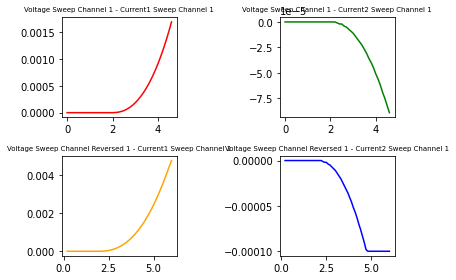

<Figure size 2000x2000 with 0 Axes>

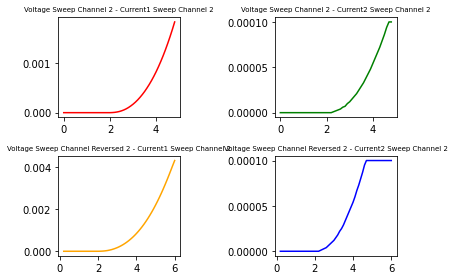

<Figure size 2000x2000 with 0 Axes>

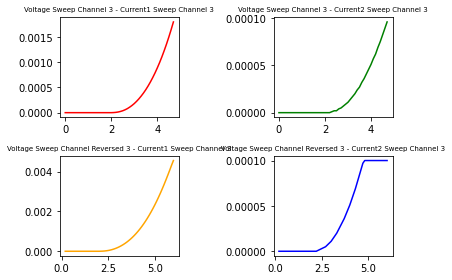

<Figure size 2000x2000 with 0 Axes>

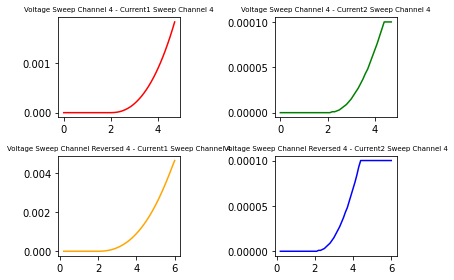

<Figure size 2000x2000 with 0 Axes>

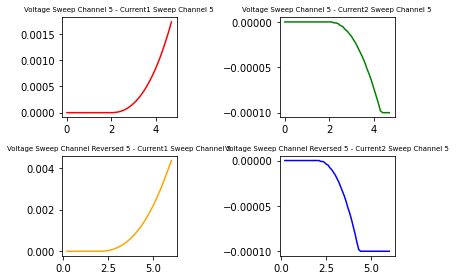

<Figure size 2000x2000 with 0 Axes>

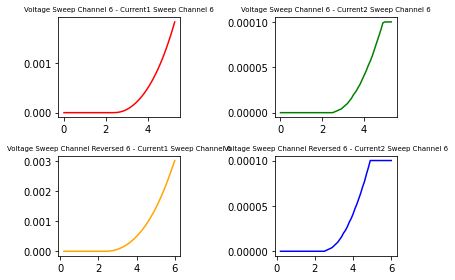

<Figure size 2000x2000 with 0 Axes>

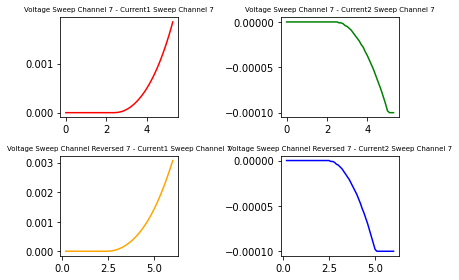

<Figure size 2000x2000 with 0 Axes>

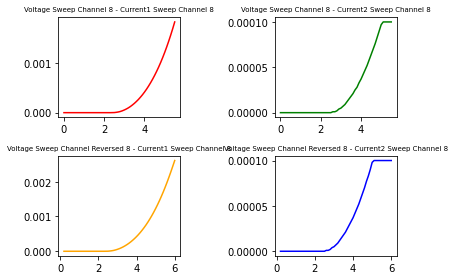

<Figure size 2000x2000 with 0 Axes>

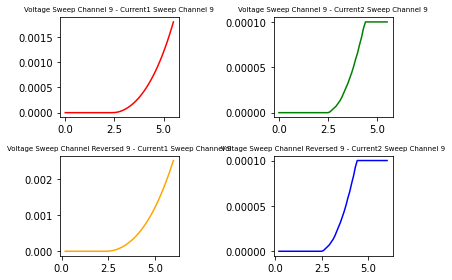

<Figure size 2000x2000 with 0 Axes>

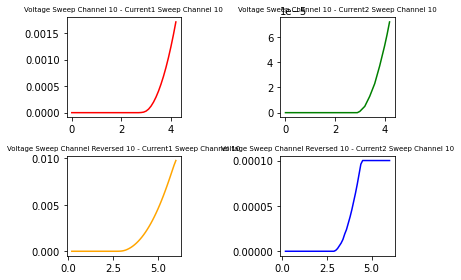

<Figure size 2000x2000 with 0 Axes>

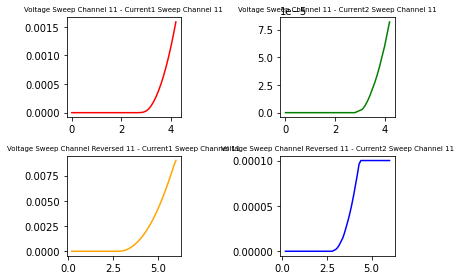

<Figure size 2000x2000 with 0 Axes>

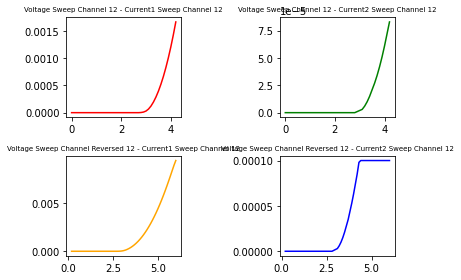

<Figure size 2000x2000 with 0 Axes>

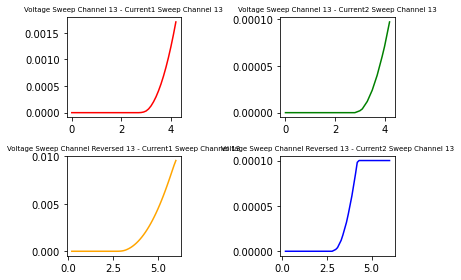

<Figure size 2000x2000 with 0 Axes>

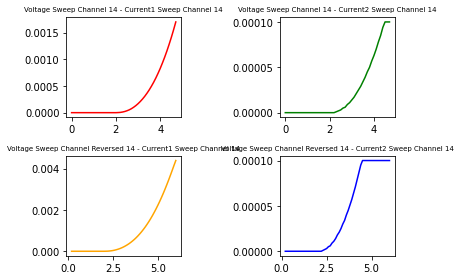

<Figure size 2000x2000 with 0 Axes>

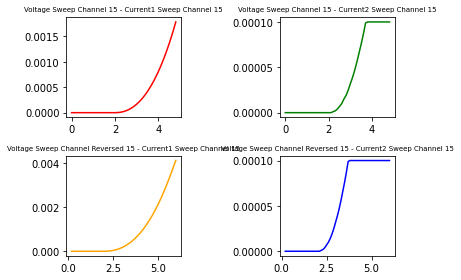

<Figure size 2000x2000 with 0 Axes>

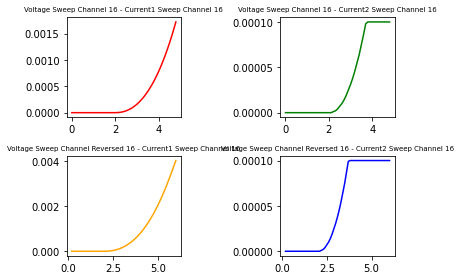

<Figure size 2000x2000 with 0 Axes>

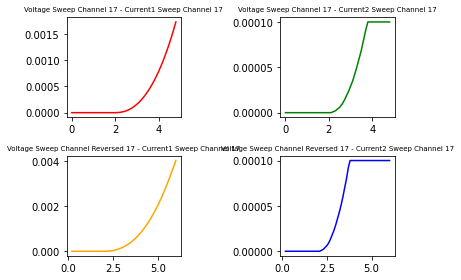

<Figure size 2000x2000 with 0 Axes>

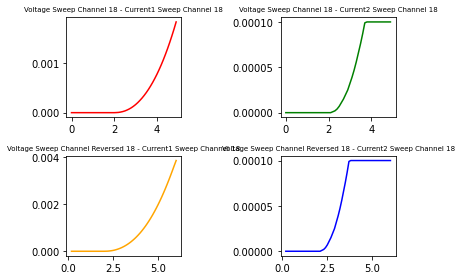

<Figure size 2000x2000 with 0 Axes>

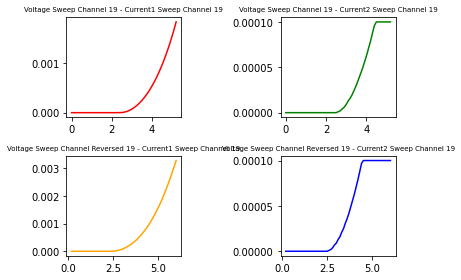

<Figure size 2000x2000 with 0 Axes>

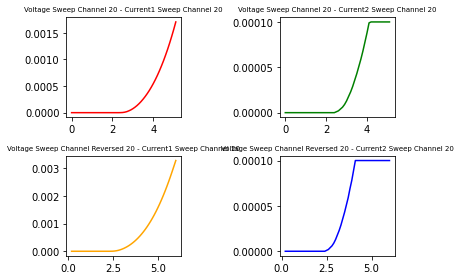

<Figure size 2000x2000 with 0 Axes>

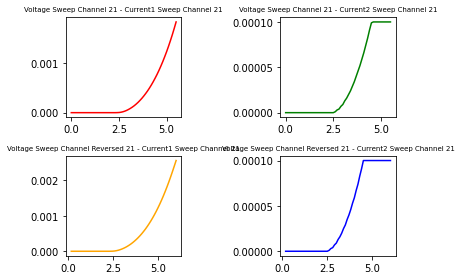

<Figure size 2000x2000 with 0 Axes>

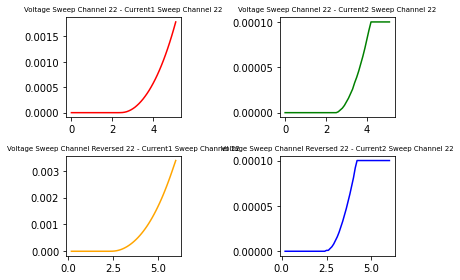

<Figure size 2000x2000 with 0 Axes>

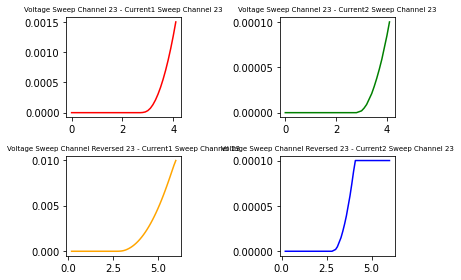

<Figure size 2000x2000 with 0 Axes>

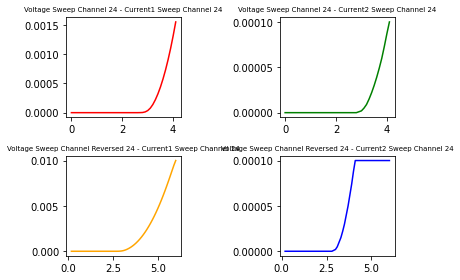

<Figure size 2000x2000 with 0 Axes>

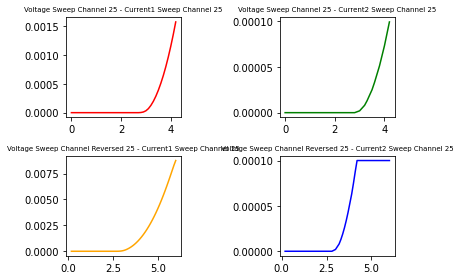

<Figure size 2000x2000 with 0 Axes>

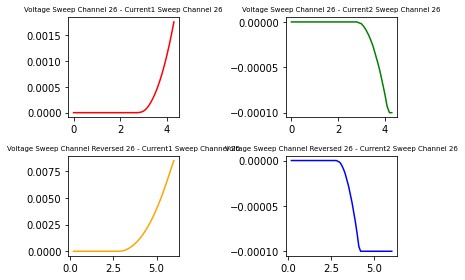

<Figure size 2000x2000 with 0 Axes>

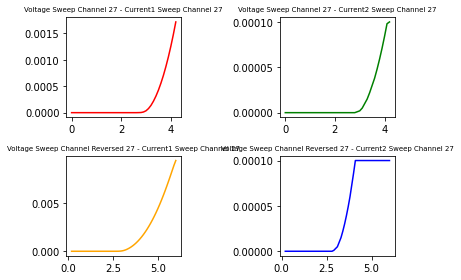

In [33]:
for i in range (1,28):
   
  V_s = led_data(i,9)
  C1 = led_data(i,10)
  C2 = led_data(i,11)
  

  V_sr =  led_data(i,15)
  C1_r = led_data(i,16)
  C2_r = led_data(i,17)
  

  plt.figure(i)
  figure(figsize=(20, 20), dpi=100)
  fig, ax = plt.subplots(2, 2)

  ax[0, 0].plot(V_s,C1[0:len(V_s)],color = 'red')
  ax[0, 1].plot(V_s,C2[0:len(V_s)],color = 'green')
  ax[1, 0].plot(V_sr,C1_r[0:len(V_sr)],color = 'orange')
  ax[1, 1].plot(V_sr,C2_r[0:len(V_sr)],color = 'blue')

  ax[0, 0].set_title("Voltage Sweep Channel %s - Current1 Sweep Channel %s" %(i,i),fontsize= 7)
  ax[0, 1].set_title("Voltage Sweep Channel %s - Current2 Sweep Channel %s" %(i,i),fontsize= 7)
  ax[1, 0].set_title("Voltage Sweep Channel Reversed %s - Current1 Sweep Channel %s" %(i,i),fontsize= 7)
  ax[1, 1].set_title("Voltage Sweep Channel Reversed %s - Current2 Sweep Channel %s" %(i,i),fontsize= 7)

  fig.tight_layout()

plt.show()